In [4]:
import sys
import copy
import json
sys.path.append("../../")
from datetime import datetime
from dateutil.relativedelta import relativedelta
from stock.stock.stock_ds import StocksAnalysis, StocksPicker
from stock.stock.stock_picker import NObservationPeriodStockPicker,compute_win_ratio_for_stocks, filter_stocks_on_win_ratio

In [5]:
# Get base stocks
with open('../../top_stocks.txt') as file:
    lines = file.readlines()
    base_stocks = [line.strip() for line in lines]


In [6]:
# Read Stock data
sa = StocksAnalysis(copy.deepcopy(base_stocks))
with open('stock_prices.json') as f:
    js = json.load(f)
sa.load_stock_detail_json(js)


In [7]:
# Pick stocks
def get_top_stocks(t_base_stocks, threshold=0.8, target_date=None, period_in_days=50, obs_len=10, stock_analysis_ins_t=None):
    sp = NObservationPeriodStockPicker(t_base_stocks)
    sp.set_stock_analysis_instance(sa)
    st_res = sp.pick_stocks(threshold=threshold,
                                target_date=target_date,
                                period_in_days=period_in_days,
                                observation_period_length=obs_len,
                                stock_analysis_instance = stock_analysis_ins_t)
    return st_res

In [8]:
# Compute gain for period
def compute_gain_for_period(stock_analysis_ins_t, stocks_t, index_date, target_date):
    g = -1000
#    for v in [-1,-2-3,0]:
    for v in [-1,1,0]:
#    for v in [-1,0]:
        t_d = target_date + relativedelta(days=v)
        g = max(g, stock_analysis_ins_t.compute_gain_for_period(index_date.strftime("%Y-%m-%d"), t_d.strftime("%Y-%m-%d"), stocks_t))
    return g

In [9]:
# Compute results for year
def compute_results_for_year(year, t_base_stocks, threshold, period_in_days, obs_len, sa_t):
    result = {}
    target_date_str = str(year) + '-01-01'
    target_date = datetime.strptime(target_date_str, '%Y-%m-%d')
    while target_date.year != year + 1:
        res = {}
        st_res = get_top_stocks(t_base_stocks, threshold, target_date, period_in_days, obs_len, sa_t)
        prefiltered_stocks, top_stocks = st_res[0], st_res[1]
        pred_target_date = target_date + relativedelta(days=obs_len)
        res['top_stocks_len'] = len(top_stocks)
        res['sp_stocks_len'] = len(prefiltered_stocks)
        res['base_gain'] = compute_gain_for_period(sa_t, t_base_stocks, target_date, pred_target_date)
        res['sp_gain'] = compute_gain_for_period(sa_t, prefiltered_stocks, target_date, pred_target_date)        
        res['top_gain'] = compute_gain_for_period(sa_t, top_stocks, target_date, pred_target_date)
        result[target_date] = res
        target_date = target_date + relativedelta(days=obs_len)
    return result

In [14]:
def get_average(result):
    sp_avg, top_avg, base_gain_avg, sp_gain_avg, top_gain_avg = 0,0,0,0,0
    size = float(len(result))
    for r in result:
        r = result[r]
        sp_avg += r['sp_stocks_len']
        top_avg += r['top_stocks_len']
        base_gain_avg += r['base_gain']
        sp_gain_avg += r['sp_gain']
        top_gain_avg += r['top_gain']
    sp_avg, top_avg, base_gain_avg, sp_gain_avg, top_gain_avg = sp_avg/size, top_avg/size, base_gain_avg/size, sp_gain_avg/size, top_gain_avg/size
#    print (sp_avg,' ', top_avg,' ', base_gain_avg,' ', sp_gain_avg,' ', top_gain_avg)
    print (top_gain_avg)
    if top_gain_avg > sp_gain_avg and top_gain_avg > base_gain_avg: return True
    else: return False
year = 2014
wins = 0
"""
wins = 0
while year < 2021:
    result = compute_results_for_year(year, base_stocks, 0.8, 100, 10, sa)
    print (year)
    if get_average(result): wins += 1
    year += 1
"""
"""
obs = 10
while obs <= 150:
    result = compute_results_for_year(year, base_stocks, 0.8, obs, 10, sa)
#    print (year)
    if get_average(result): wins += 1
    obs += 10
""" 
obs = 5
while obs <= 30:
    result = compute_results_for_year(year, base_stocks, 0.8, 100, obs, sa)
#    print (year)
    if get_average(result): wins += 1
    obs += 5

print ('Total Wins - ', wins)

0.610063930965974
0.8711558520136851
0.25218393185574817
0.5481057659719881
1.2670012992697373
1.1859473943110481
Total Wins -  6


In [ ]:
import matplotlib.pyplot as plt 
res = [0.34239986901226926,0.24332648639445192,0.3075372004104745,0.32275703127050565,0.29891668680596145,0.3804634661063296,0.32386792830366906,0.3874637021519976,0.3832990583070473,0.4472267614653048,0.5226233294908793,0.3466632767656071,0.32989859845493436,-0.02295808809323022]
xaxis = [1,2,3,4,5,6,7,8,9,10,11,12,13,14]
plt.plot(xaxis, res, 'go-', label='line 1', linewidth=2)
plt.xlabel('Length Observation Periods')
plt.ylabel('Gain')
plt.savefig('obs_period_comparison.png')

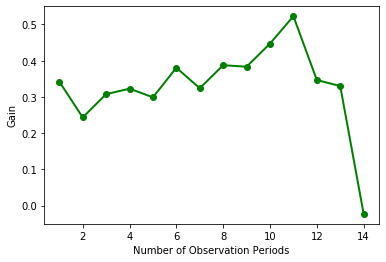

In [52]:
import matplotlib.pyplot as plt 
res = [0.34239986901226926,0.24332648639445192,0.3075372004104745,0.32275703127050565,0.29891668680596145,0.3804634661063296,0.32386792830366906,0.3874637021519976,0.3832990583070473,0.4472267614653048,0.5226233294908793,0.3466632767656071,0.32989859845493436,-0.02295808809323022]
xaxis = [1,2,3,4,5,6,7,8,9,10,11,12,13,14]
plt.plot(xaxis, res, 'go-', label='line 1', linewidth=2)
plt.xlabel('Number of Observation Periods')
plt.ylabel('Gain')
plt.savefig('obs_period_comparison.png')

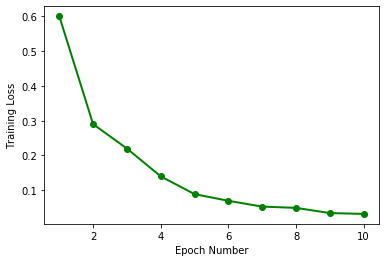

In [3]:
res = [0.60,0.29,0.22,0.14,0.089,0.0698,0.0532,0.04949,0.0346,0.03216]
xaxis = [1,2,3,4,5,6,7,8,9,10]
plt.plot(xaxis, res, 'go-', label='line 1', linewidth=2)
plt.xlabel('Epoch Number')
plt.ylabel('Training Loss')
plt.savefig('training_loss.png')

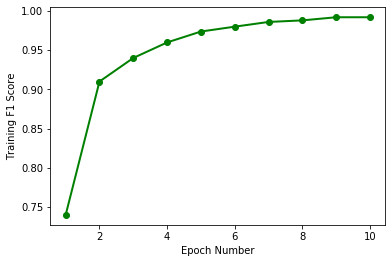

In [2]:
import matplotlib.pyplot as plt 
res = [0.74,0.91,0.94,0.9598,0.9737,0.9799,0.9859,0.9879,0.9919,0.9919]
xaxis = [1,2,3,4,5,6,7,8,9,10]
plt.plot(xaxis, res, 'go-', label='line 1', linewidth=2)
plt.xlabel('Epoch Number')
plt.ylabel('Training F1 Score')
plt.savefig('training_f1_score.png')